In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

In [74]:
Data=pd.read_csv('C:/Users/anamk/Downloads/Hair Salon.csv')

In [75]:
Data.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [76]:
Data.duplicated().sum()

0

In [77]:
Data.tail()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
95,96,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6,7.3
96,97,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7,6.3
97,98,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5,5.4
98,99,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9,6.4
99,100,7.9,3.0,4.4,5.1,5.9,4.2,4.8,9.7,5.7,3.4,3.5,6.4


In [78]:
Data.isnull().sum()

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

In [79]:
Data.shape

(100, 13)

In [80]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,50.500,29.011492,1.0,25.750,50.50,75.250,100.0
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1


In [81]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


Part 1: PCA: Perform Exploratory Data Analysis (both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.


In [82]:
def univariateAnalysis_numeric(column,nbins):
   
   
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    sns.distplot(Data[column], kde=True, color='g');
    plt.subplot(2,2,2)
    ax = sns.boxplot(x=Data[column])
    plt.show()

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


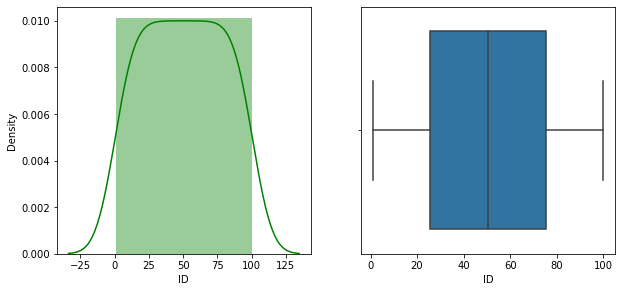

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


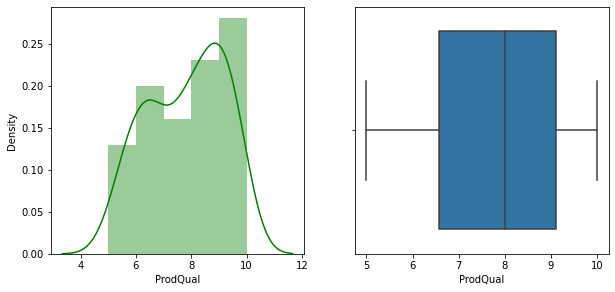

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


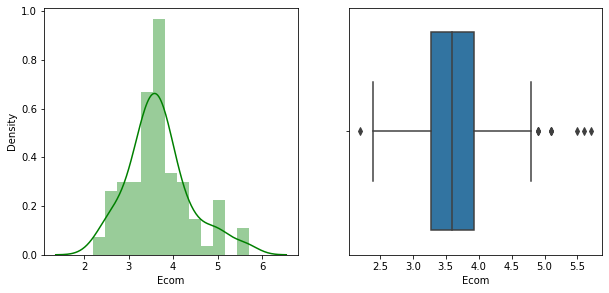

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


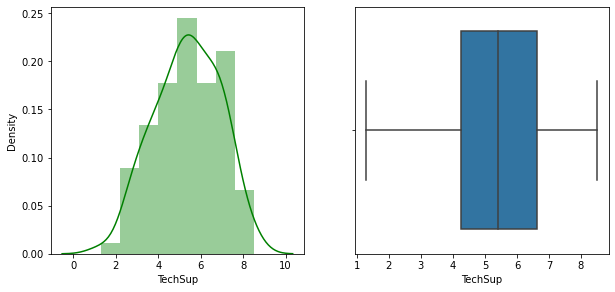

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


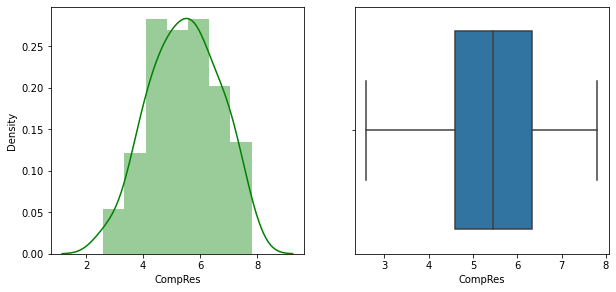

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


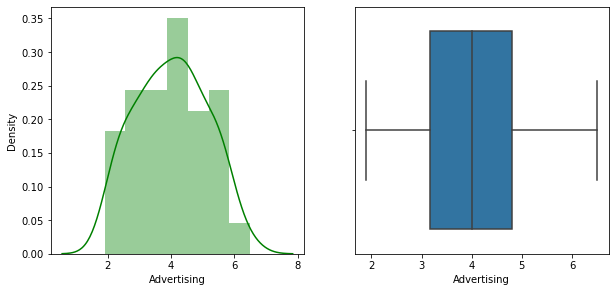

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


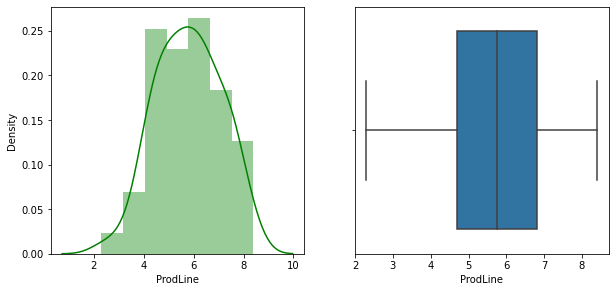

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


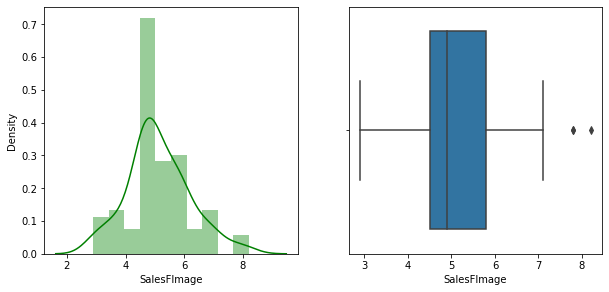

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


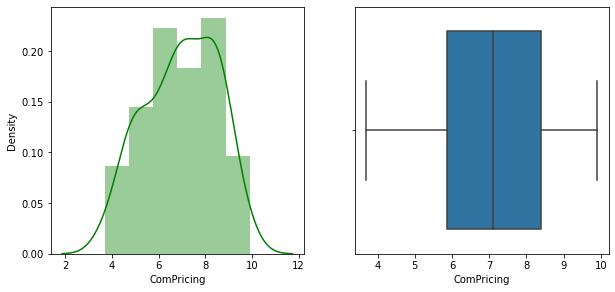

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


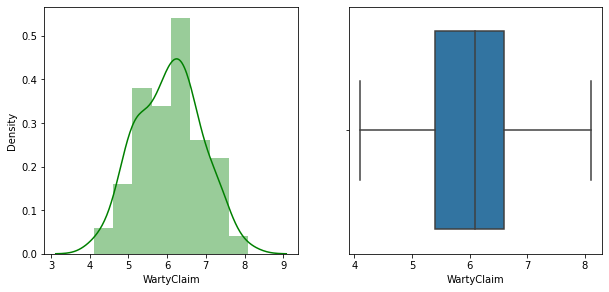

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


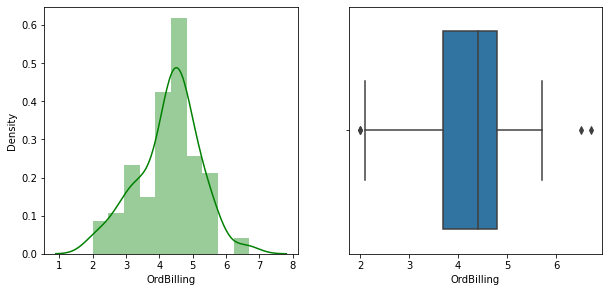

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


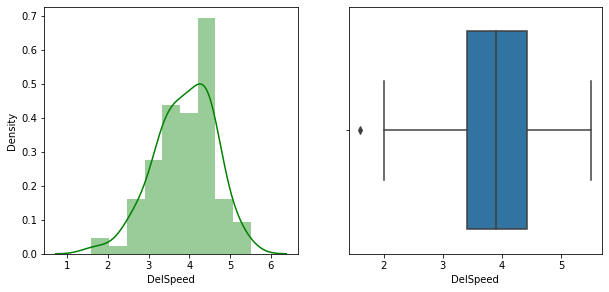

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


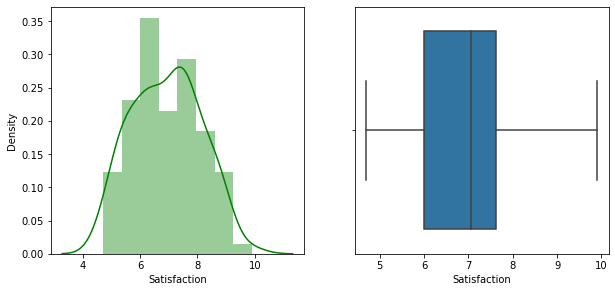

In [83]:
for i in Data.columns:
        univariateAnalysis_numeric(i,5)

In [84]:
Data_new=Data.copy()
Data_new.drop(['ID'],axis=1 ,inplace= True)

In [85]:
Data_new.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


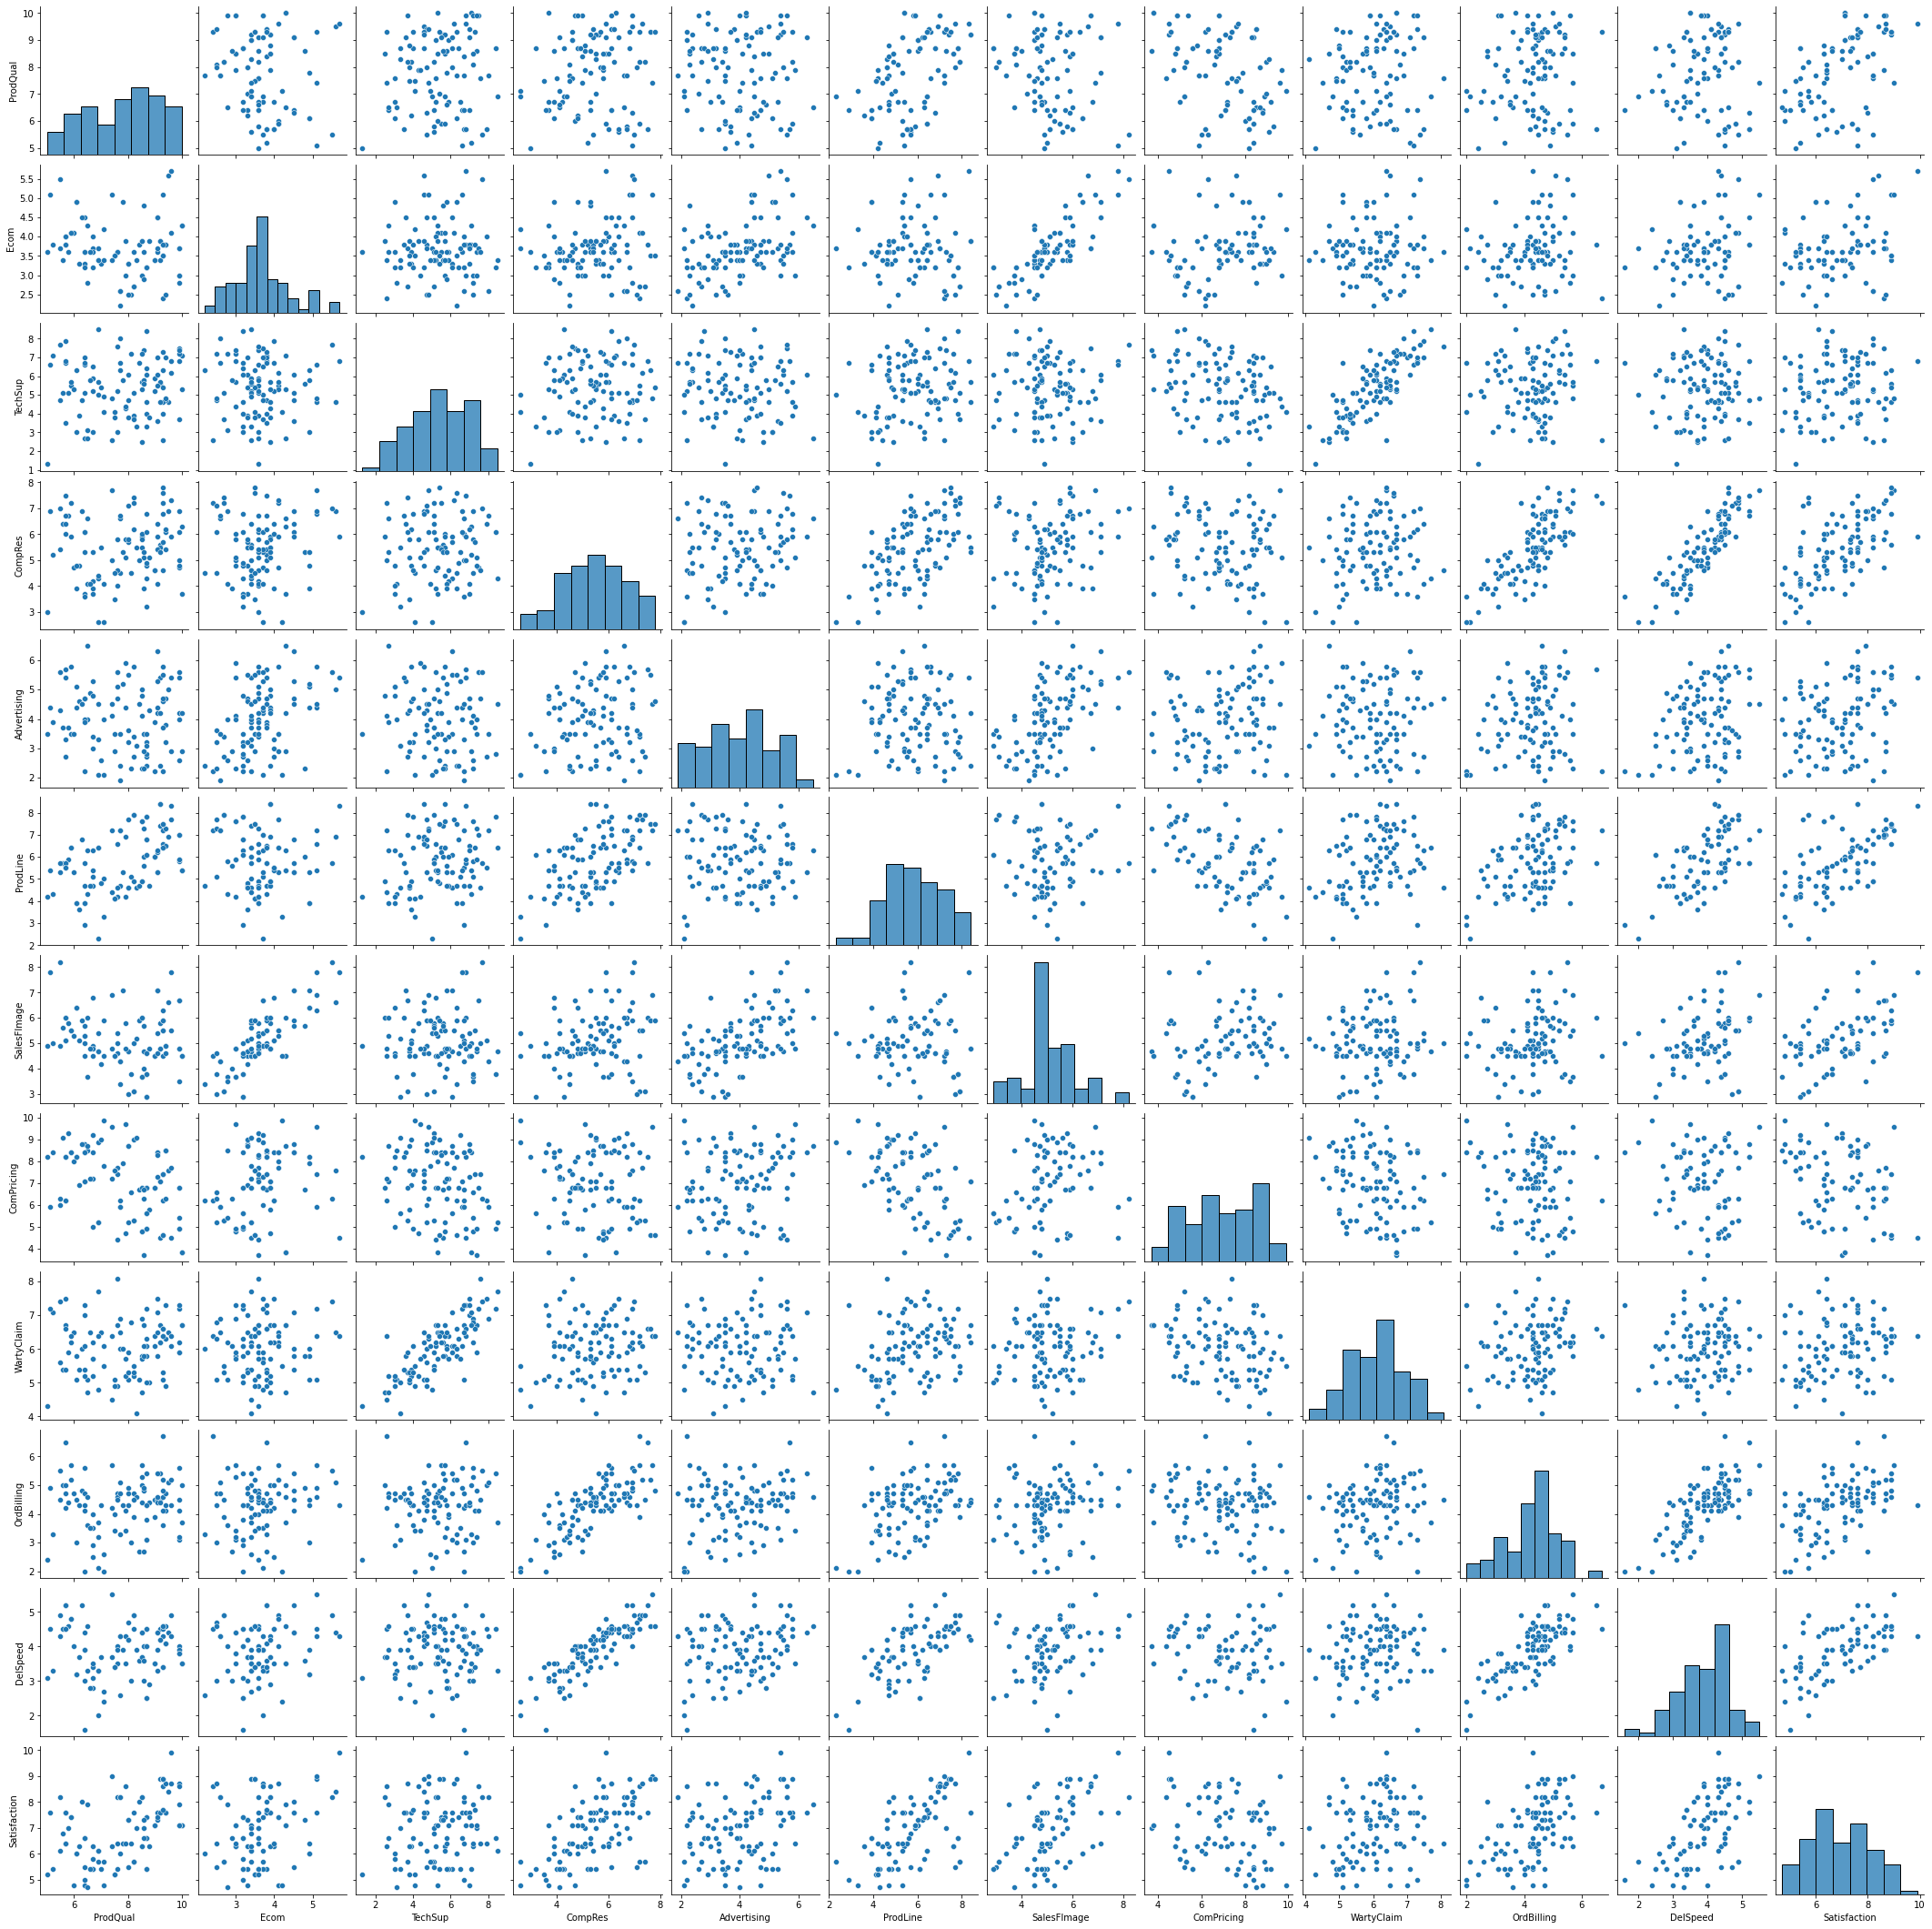

In [86]:
sns.pairplot(Data_new)

In [87]:
corr=Data_new.corr()

<AxesSubplot:>

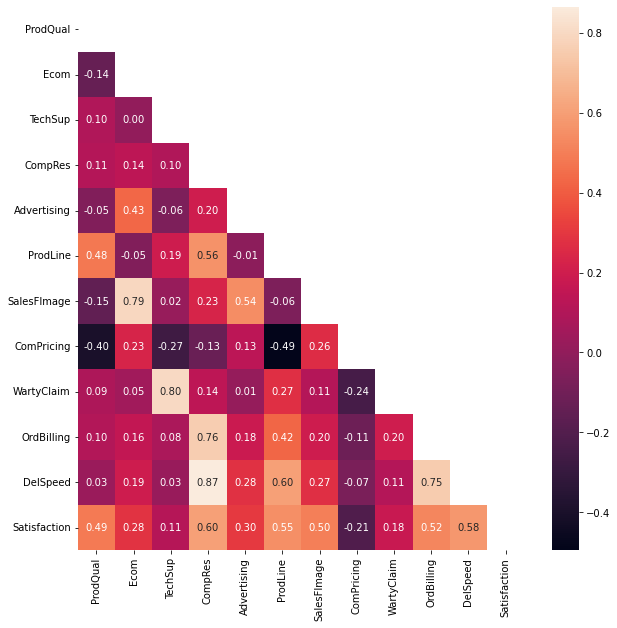

In [88]:
plt.figure(figsize = (10,10))
matrix = np.triu(corr)
sns.heatmap(Data_new.corr(), annot=True,fmt='.2f', mask=matrix)

Part 1: PCA: Scale the variables and write the inference for using the type of scaling function for this case study.

In [95]:
from scipy.stats import zscore
Data_scaled=Data_new.apply(zscore)
Data_scaled.head().round(2)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,0.50,0.33,-1.88,0.38,0.70,-0.69,0.82,-0.11,-1.65,0.78,-0.25,1.08
1,0.28,-1.39,-0.17,1.46,-0.54,1.60,-1.90,-1.09,-0.67,-0.41,1.39,-1.03
2,1.00,-0.39,0.15,0.13,1.24,1.22,0.63,-1.61,0.19,1.21,0.84,1.67
3,-1.01,-0.53,1.07,-1.45,0.62,-0.84,-0.58,1.19,1.17,0.02,-1.21,-1.79
4,0.86,-0.39,-0.11,-0.70,-1.61,0.15,-0.58,-0.11,0.07,0.24,-0.53,0.15


Part 1: PCA: Comment on the comparison between covariance and the correlation matrix after scaling.

In [90]:
Data_scaled.cov().round(2)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.01,-0.14,0.10,0.11,-0.05,0.48,-0.15,-0.41,0.09,0.11,0.03,0.49
Ecom,-0.14,1.01,0.00,0.14,0.43,-0.05,0.80,0.23,0.05,0.16,0.19,0.29
TechSup,0.10,0.00,1.01,0.10,-0.06,0.19,0.02,-0.27,0.81,0.08,0.03,0.11
CompRes,0.11,0.14,0.10,1.01,0.20,0.57,0.23,-0.13,0.14,0.76,0.87,0.61
Advertising,-0.05,0.43,-0.06,0.20,1.01,-0.01,0.55,0.14,0.01,0.19,0.28,0.31
ProdLine,0.48,-0.05,0.19,0.57,-0.01,1.01,-0.06,-0.50,0.28,0.43,0.61,0.56
SalesFImage,-0.15,0.80,0.02,0.23,0.55,-0.06,1.01,0.27,0.11,0.20,0.27,0.51
ComPricing,-0.41,0.23,-0.27,-0.13,0.14,-0.50,0.27,1.01,-0.25,-0.12,-0.07,-0.21
WartyClaim,0.09,0.05,0.81,0.14,0.01,0.28,0.11,-0.25,1.01,0.20,0.11,0.18
OrdBilling,0.11,0.16,0.08,0.76,0.19,0.43,0.20,-0.12,0.20,1.01,0.76,0.53


In [92]:
Data_new.cov().round(2)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.95,-0.13,0.20,0.18,-0.08,0.88,-0.23,-0.87,0.10,0.14,0.03,0.81
Ecom,-0.13,0.49,0.00,0.12,0.34,-0.05,0.59,0.25,0.03,0.10,0.10,0.24
TechSup,0.20,0.00,2.34,0.18,-0.11,0.39,0.03,-0.64,1.00,0.11,0.03,0.21
CompRes,0.18,0.12,0.18,1.46,0.27,0.89,0.30,-0.24,0.14,0.85,0.77,0.87
Advertising,-0.08,0.34,-0.11,0.27,1.27,-0.02,0.66,0.23,0.01,0.19,0.23,0.41
ProdLine,0.88,-0.05,0.39,0.89,-0.02,1.73,-0.09,-1.01,0.29,0.52,0.58,0.86
SalesFImage,-0.23,0.59,0.03,0.30,0.66,-0.09,1.15,0.44,0.09,0.19,0.21,0.64
ComPricing,-0.87,0.25,-0.64,-0.24,0.23,-1.01,0.44,2.39,-0.31,-0.16,-0.08,-0.38
WartyClaim,0.10,0.03,1.00,0.14,0.01,0.29,0.09,-0.31,0.67,0.15,0.07,0.17
OrdBilling,0.14,0.10,0.11,0.85,0.19,0.52,0.19,-0.16,0.15,0.86,0.51,0.58


In [93]:
Data_scaled.corr().round(2)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.00,-0.14,0.10,0.11,-0.05,0.48,-0.15,-0.40,0.09,0.10,0.03,0.49
Ecom,-0.14,1.00,0.00,0.14,0.43,-0.05,0.79,0.23,0.05,0.16,0.19,0.28
TechSup,0.10,0.00,1.00,0.10,-0.06,0.19,0.02,-0.27,0.80,0.08,0.03,0.11
CompRes,0.11,0.14,0.10,1.00,0.20,0.56,0.23,-0.13,0.14,0.76,0.87,0.60
Advertising,-0.05,0.43,-0.06,0.20,1.00,-0.01,0.54,0.13,0.01,0.18,0.28,0.30
ProdLine,0.48,-0.05,0.19,0.56,-0.01,1.00,-0.06,-0.49,0.27,0.42,0.60,0.55
SalesFImage,-0.15,0.79,0.02,0.23,0.54,-0.06,1.00,0.26,0.11,0.20,0.27,0.50
ComPricing,-0.40,0.23,-0.27,-0.13,0.13,-0.49,0.26,1.00,-0.24,-0.11,-0.07,-0.21
WartyClaim,0.09,0.05,0.80,0.14,0.01,0.27,0.11,-0.24,1.00,0.20,0.11,0.18
OrdBilling,0.10,0.16,0.08,0.76,0.18,0.42,0.20,-0.11,0.20,1.00,0.75,0.52


In [94]:
Data_new.corr().round(2)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.00,-0.14,0.10,0.11,-0.05,0.48,-0.15,-0.40,0.09,0.10,0.03,0.49
Ecom,-0.14,1.00,0.00,0.14,0.43,-0.05,0.79,0.23,0.05,0.16,0.19,0.28
TechSup,0.10,0.00,1.00,0.10,-0.06,0.19,0.02,-0.27,0.80,0.08,0.03,0.11
CompRes,0.11,0.14,0.10,1.00,0.20,0.56,0.23,-0.13,0.14,0.76,0.87,0.60
Advertising,-0.05,0.43,-0.06,0.20,1.00,-0.01,0.54,0.13,0.01,0.18,0.28,0.30
ProdLine,0.48,-0.05,0.19,0.56,-0.01,1.00,-0.06,-0.49,0.27,0.42,0.60,0.55
SalesFImage,-0.15,0.79,0.02,0.23,0.54,-0.06,1.00,0.26,0.11,0.20,0.27,0.50
ComPricing,-0.40,0.23,-0.27,-0.13,0.13,-0.49,0.26,1.00,-0.24,-0.11,-0.07,-0.21
WartyClaim,0.09,0.05,0.80,0.14,0.01,0.27,0.11,-0.24,1.00,0.20,0.11,0.18
OrdBilling,0.10,0.16,0.08,0.76,0.18,0.42,0.20,-0.11,0.20,1.00,0.75,0.52


In [33]:
def graph(column):

    plt.figure(figsize=(15,15))
    plt.subplot(2,2,1)
    ax = sns.boxplot(x=Data_new[column])
    plt.subplot(2,2,2)
    ax = sns.boxplot(x=Data_scaled[column])
    

In [34]:
plt.show()

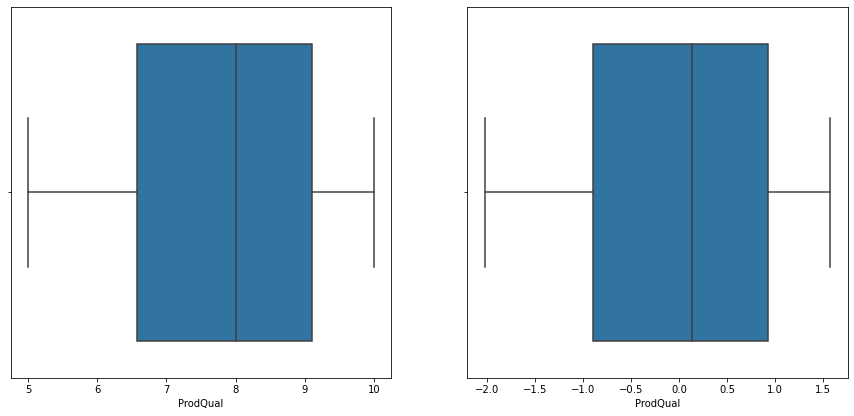

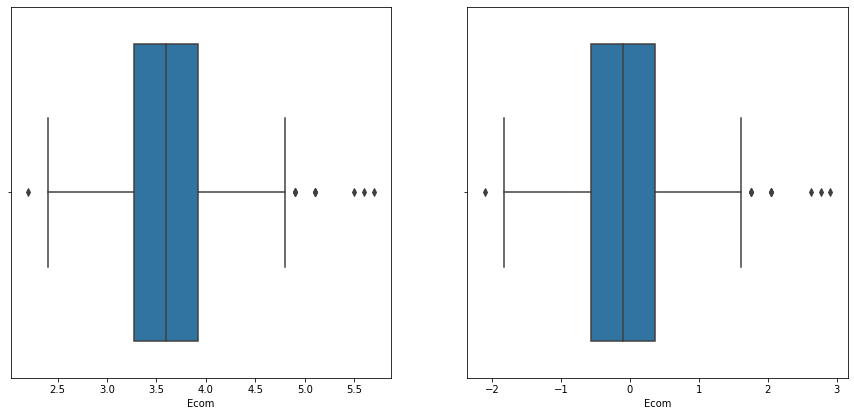

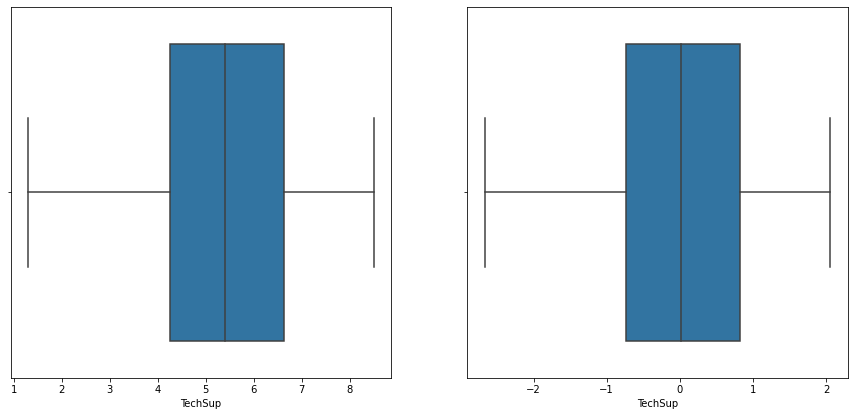

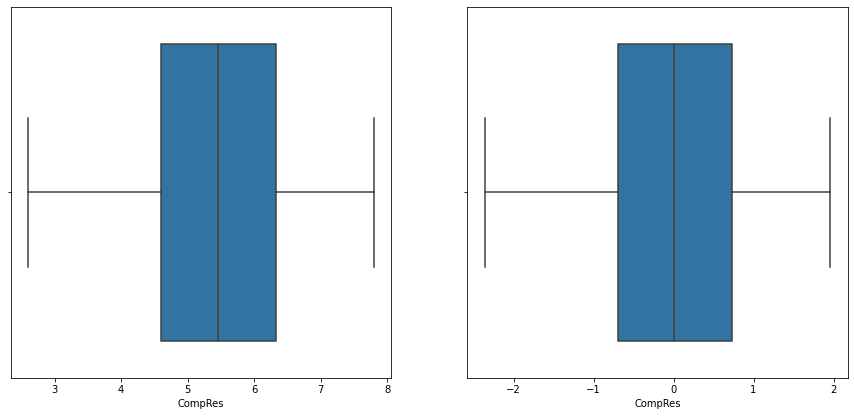

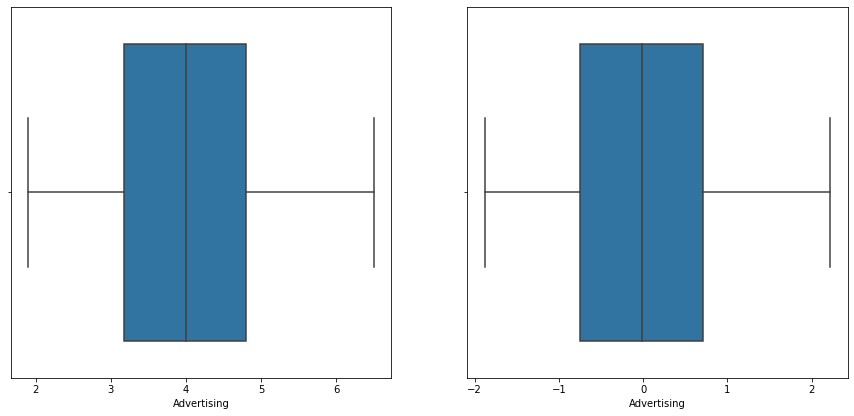

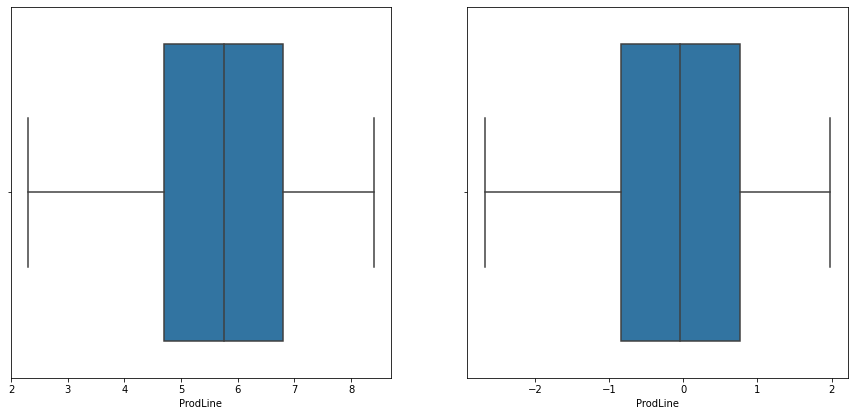

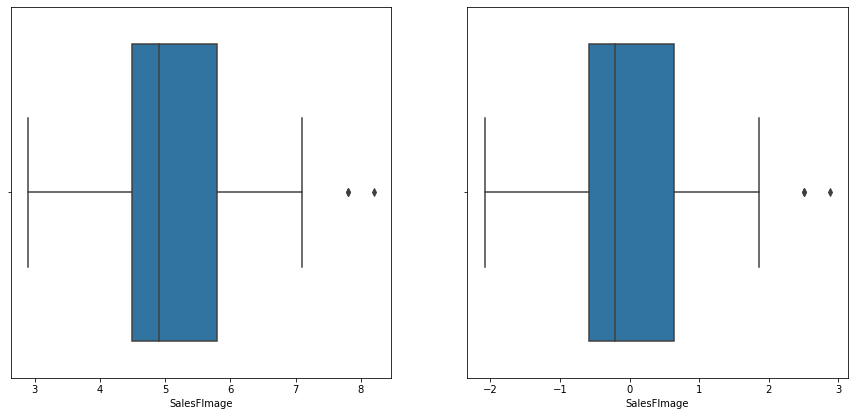

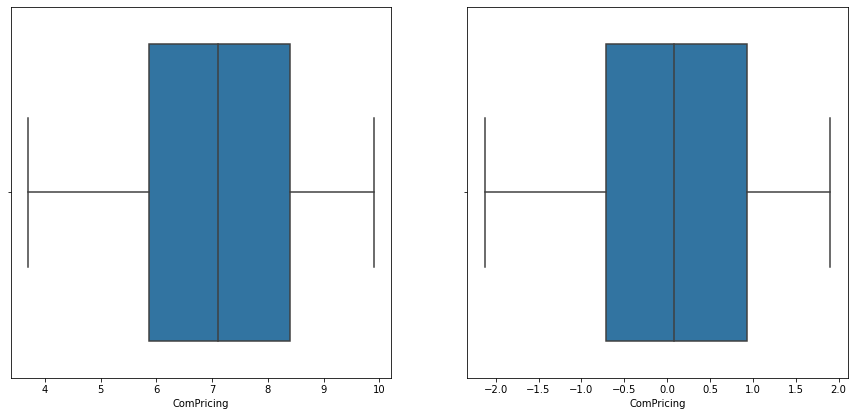

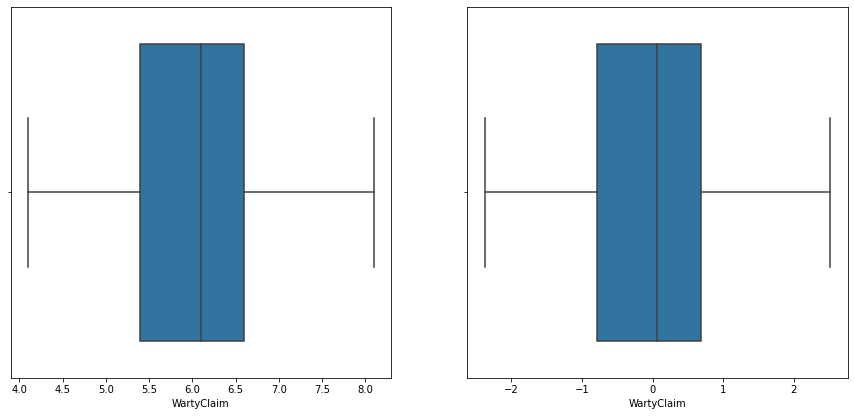

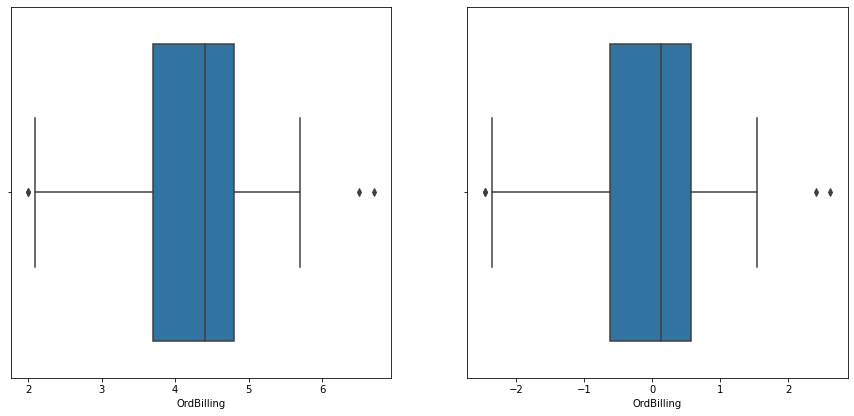

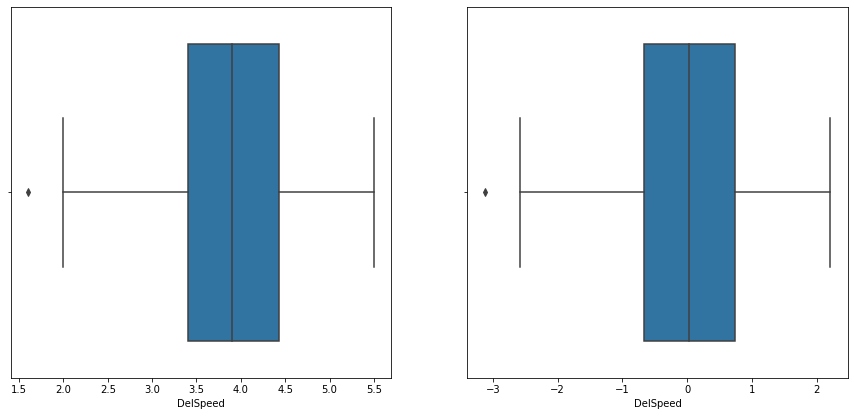

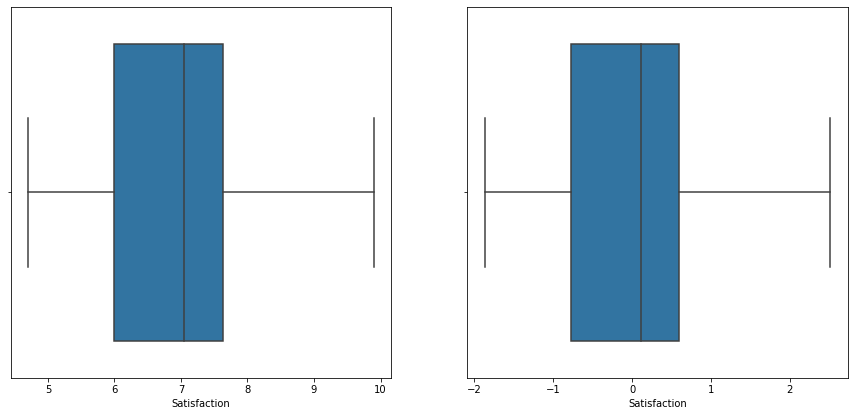

In [35]:
for i in Data_new.columns:
    graph(i)

In [96]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q75 if y > upper_bound else y).apply(lambda y: q25 if y < lower_bound else y)

In [97]:
outlier_var = ['Ecom', 'SalesFImage', 'OrdBilling', 'DelSpeed']

In [98]:
for i in Data_scaled[outlier_var]:    
    Data_scaled[i]=treat_outlier(Data_scaled[i])

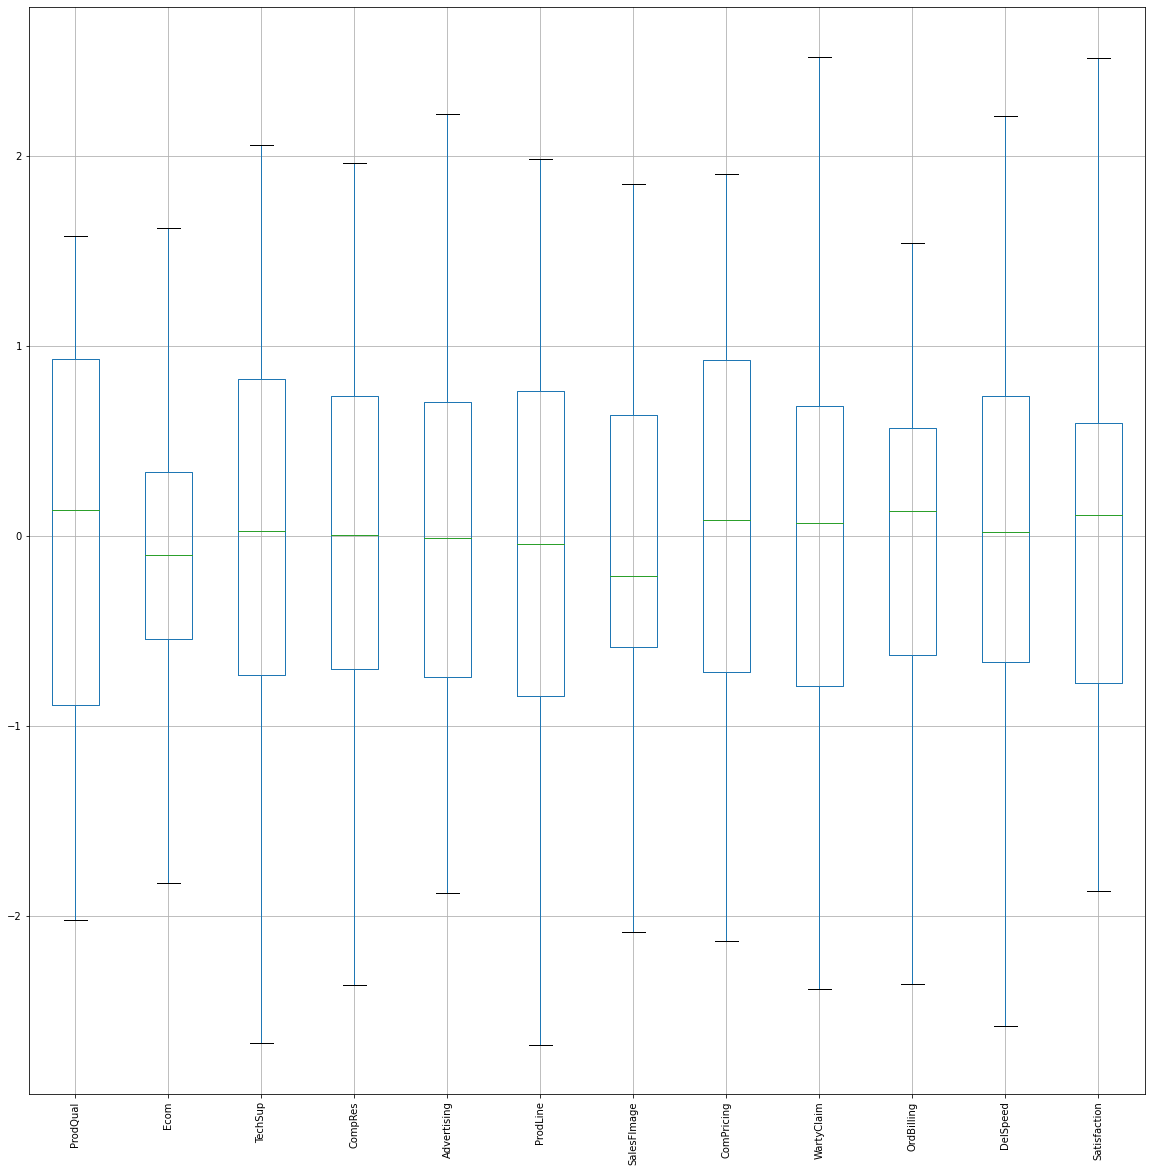

In [100]:
Data_scaled.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

Part 1: PCA: Build the covariance matrix, eigenvalues and eigenvector.

In [101]:
Data_scaled.drop(['Satisfaction'],axis=1, inplace= True)

In [104]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(Data_scaled)
p_value

1.6925483779489794e-87

In [105]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(Data_scaled)
kmo_model

0.6473728566230824

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11, random_state=123)
pca_transformed = pca.fit_transform(Data_scaled)


In [115]:
pca.components_.round(2)

array([[-0.21,  0.01, -0.24, -0.47, -0.1 , -0.46, -0.05,  0.25, -0.28,
        -0.36, -0.43],
       [-0.28,  0.27, -0.28,  0.23,  0.41, -0.15,  0.44,  0.42, -0.21,
         0.19,  0.28],
       [ 0.24, -0.18, -0.6 ,  0.17, -0.17,  0.23, -0.24, -0.13, -0.6 ,
         0.05,  0.13],
       [ 0.61,  0.19, -0.07, -0.22,  0.52,  0.13,  0.32, -0.23, -0.05,
        -0.2 , -0.23],
       [-0.53, -0.22, -0.04,  0.01,  0.54, -0.01, -0.22, -0.54, -0.06,
        -0.16,  0.05],
       [ 0.25, -0.54,  0.1 ,  0.08,  0.42, -0.03, -0.36,  0.55,  0.09,
        -0.1 ,  0.05],
       [-0.23,  0.  , -0.04, -0.05, -0.11,  0.62,  0.19,  0.22,  0.06,
        -0.65,  0.16],
       [ 0.11, -0.18,  0.42,  0.49, -0.12, -0.34,  0.28, -0.13, -0.39,
        -0.4 ,  0.04],
       [ 0.04, -0.53, -0.45,  0.02, -0.14, -0.23,  0.46, -0.15,  0.45,
        -0.04,  0.07],
       [ 0.12,  0.45, -0.32,  0.43,  0.01, -0.25, -0.38, -0.02,  0.38,
        -0.38,  0.02],
       [ 0.17,  0.09,  0.07, -0.46, -0.04, -0.28, -0.1 , -0.

In [107]:
pca.explained_variance_


array([3.12504686, 2.23977366, 1.55039912, 1.04281689, 0.6183749 ,
       0.43703311, 0.39005721, 0.24491075, 0.20132541, 0.12424549,
       0.0975319 ])

In [108]:
var1=pca.explained_variance_ratio_
var1

array([0.31028567, 0.22238696, 0.15393901, 0.10354121, 0.0613984 ,
       0.04339298, 0.03872875, 0.02431717, 0.01998958, 0.01233633,
       0.00968394])

Part 1: PCA: Write the explicit form of the first PC (in terms of Eigen Vectors).

In [116]:
for i in range(0,11):
    print("(",np.round(pca.components_[0][i],2),")",'*',Data_scaled.columns[i], end=' + ')

( -0.21 ) * ProdQual + ( 0.01 ) * Ecom + ( -0.24 ) * TechSup + ( -0.47 ) * CompRes + ( -0.1 ) * Advertising + ( -0.46 ) * ProdLine + ( -0.05 ) * SalesFImage + ( 0.25 ) * ComPricing + ( -0.28 ) * WartyClaim + ( -0.36 ) * OrdBilling + ( -0.43 ) * DelSpeed + 

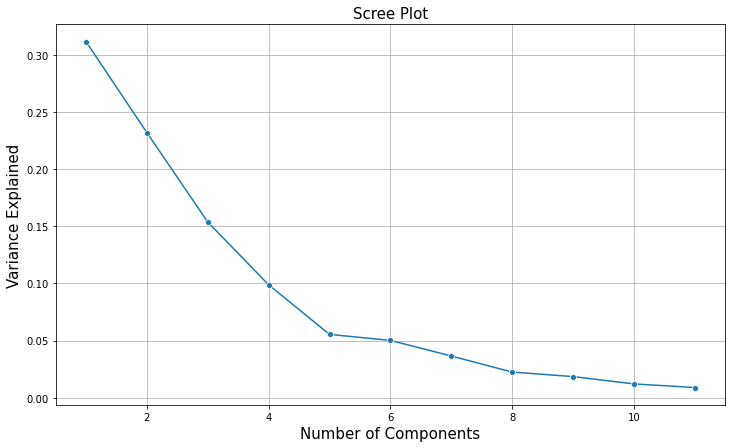

In [111]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var1,x=range(1,len(var1)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [110]:
PCA_df = pd.DataFrame(pca.components_.T,columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7', 'pc8','pc9','pc10','pc11'],index= Data_scaled.columns)

In [117]:
PCA_df.head().round(2)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
ProdQual,-0.21,-0.28,0.24,0.61,-0.53,0.25,-0.23,0.11,0.04,0.12,0.17
Ecom,0.01,0.27,-0.18,0.19,-0.22,-0.54,0.00,-0.18,-0.53,0.45,0.09
TechSup,-0.24,-0.28,-0.60,-0.07,-0.04,0.10,-0.04,0.42,-0.45,-0.32,0.07
CompRes,-0.47,0.23,0.17,-0.22,0.01,0.08,-0.05,0.49,0.02,0.43,-0.46
Advertising,-0.10,0.41,-0.17,0.52,0.54,0.42,-0.11,-0.12,-0.14,0.01,-0.04


In [112]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [113]:
var

array([31.03, 53.27, 68.66, 79.01, 85.15, 89.49, 93.36, 95.79, 97.79,
       99.02, 99.99])

In [114]:

Data_PCA = PCA_df[['pc1', 'pc2','pc3','pc4']]
Data_PCA


,pc1,pc2,pc3,pc4
ProdQual,-0.208745,-0.279020,0.236259,0.606122
Ecom,0.007857,0.272096,-0.183752,0.194641
TechSup,-0.236473,-0.279238,-0.595832,-0.074313
CompRes,-0.469586,0.232644,0.166161,-0.219218
Advertising,-0.096687,0.411747,-0.171332,0.521761
ProdLine,-0.458036,-0.149423,0.228602,0.126225
SalesFImage,-0.052649,0.436640,-0.236942,0.318674
ComPricing,0.249112,0.418113,-0.128348,-0.232362
WartyClaim,-0.283774,-0.214571,-0.595346,-0.051474
OrdBilling,-0.356631,0.191106,0.048110,-0.204045


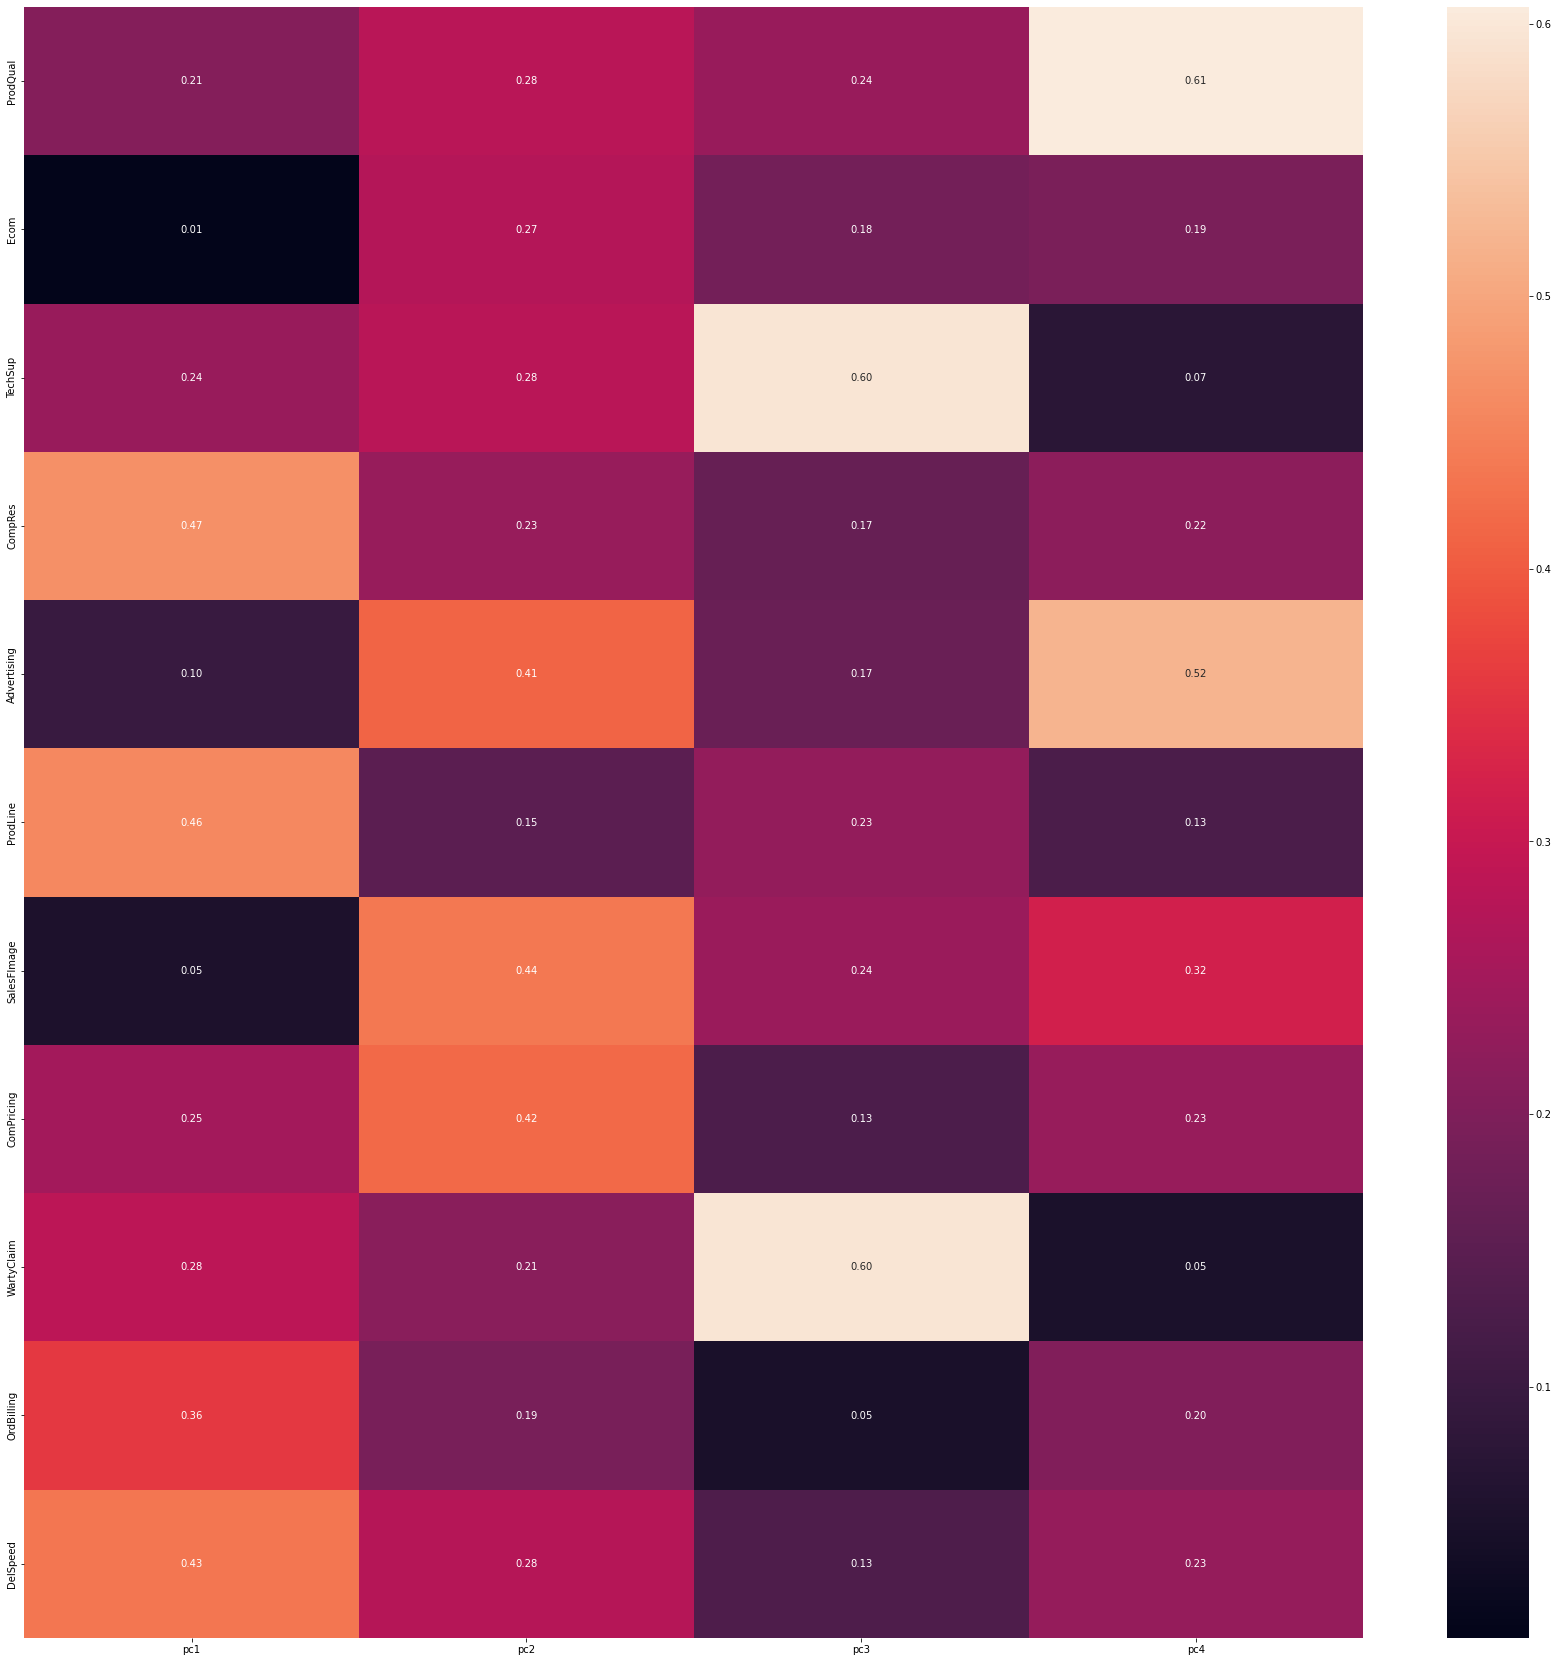

In [118]:
plt.figure(figsize = (30,30))
sns.heatmap(abs(Data_PCA), annot = True, fmt = '.2f');

CLUSTERING











In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats import zscore

Part 2: Clustering: Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, etc)

In [120]:
Df=pd.read_csv('C:/Users/anamk/Downloads/State_wise_Health_income.csv')

In [121]:
Df.head()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


In [122]:
Df.tail()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
292,292,Greencastle,3443,970,2499,238636
293,293,Greenisland,2963,793,1257,162831
294,294,Greyabbey,3276,609,1522,120184
295,295,Greysteel,3463,847,934,199403
296,296,Groggan,2070,838,3179,166767


In [123]:
Df.shape

(297, 6)

In [124]:
Df.isnull().sum()

Unnamed: 0           0
States               0
Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [125]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         297 non-null    int64 
 1   States             297 non-null    object
 2   Health_indeces1    297 non-null    int64 
 3   Health_indices2    297 non-null    int64 
 4   Per_capita_income  297 non-null    int64 
 5   GDP                297 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


In [126]:
Df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,297.0,148.000000,85.880731,0.0,74.0,148.0,222.0,296.0
Health_indeces1,297.0,2630.151515,2038.505431,-10.0,641.0,2451.0,4094.0,10219.0
Health_indices2,297.0,693.632997,468.944354,0.0,175.0,810.0,1073.0,1508.0
Per_capita_income,297.0,2156.915825,1491.854058,500.0,751.0,1865.0,3137.0,7049.0
GDP,297.0,174601.117845,167167.992863,22.0,8721.0,137173.0,313092.0,728575.0


In [127]:
Df_new=Df.copy()

In [128]:
Df_new.drop(['Unnamed: 0','States'], axis=1, inplace= True)


In [129]:
Df_new.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,417,66,564,1823
1,1485,646,2710,73662
2,654,299,1104,27318
3,192,25,573,250
4,43,8,528,22


In [130]:
def univariateAnalysis_numeric(column,nbins):
   
   
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    sns.distplot(Df_new[column], kde=True, color='g');
    plt.subplot(2,2,2)
    ax = sns.boxplot(x=Df_new[column])
    plt.show()

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


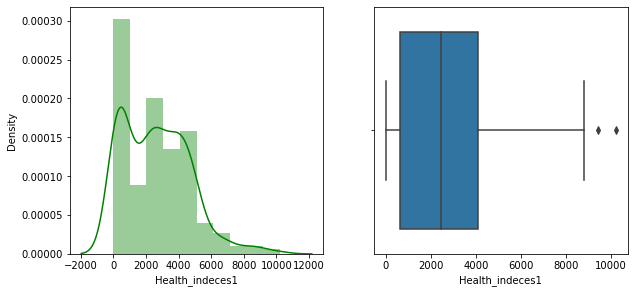

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


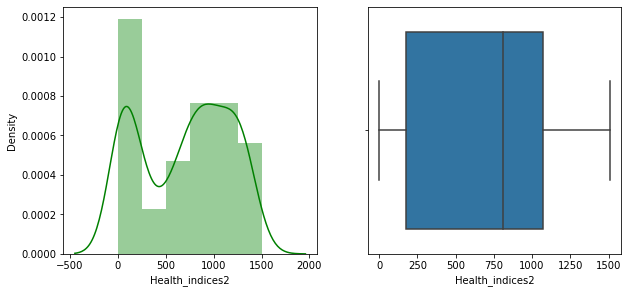

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


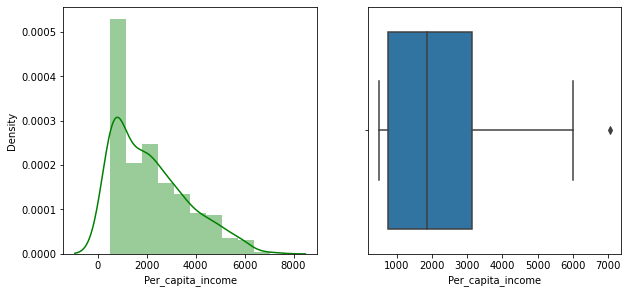

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


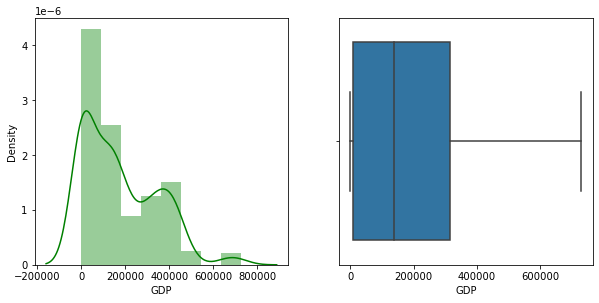

In [131]:
for i in Df_new.columns:
        univariateAnalysis_numeric(i,5);

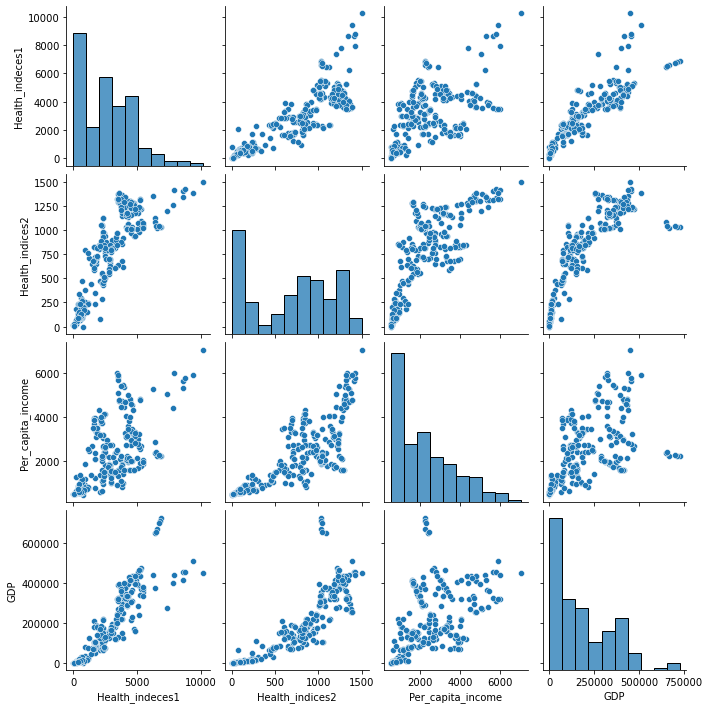

In [132]:
sns.pairplot(Df_new)

<AxesSubplot:>

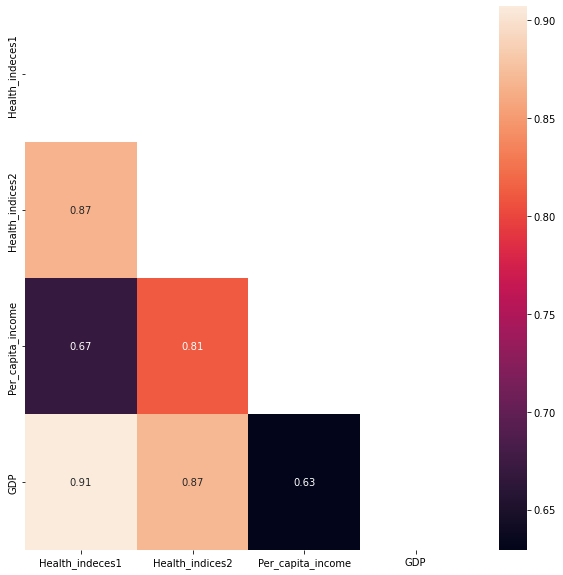

In [133]:
corr=Df_new.corr()
plt.figure(figsize = (10,10))
matrix = np.triu(corr)
sns.heatmap(Df_new.corr(), annot=True,fmt='.2f', mask=matrix)

In [134]:
from scipy.stats import zscore
Data_scaled=Df_new.apply(zscore)
Data_scaled.head().round(2)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.09,-1.34,-1.07,-1.04
1,-0.56,-0.10,0.37,-0.60
2,-0.97,-0.84,-0.71,-0.88
3,-1.20,-1.43,-1.06,-1.04
4,-1.27,-1.46,-1.09,-1.05


In [135]:
wardlink = linkage(Data_scaled, method = 'ward',metric='euclidean')

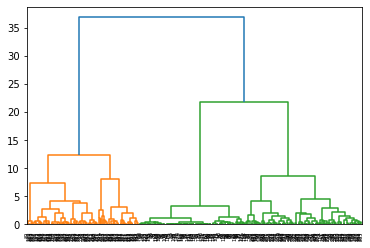

In [44]:
dend = dendrogram(wardlink)

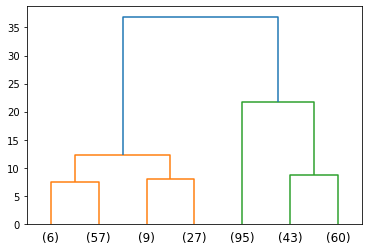

In [149]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 7,
                                  )

In [136]:
wss =[]

In [137]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(Data_scaled)
    wss.append(KM.inertia_)

C:\Users\anamk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [138]:
wss

[1188.0000000000002,
 471.3593463989938,
 260.57294083762304,
 183.60983976801262,
 149.78787362952505,
 117.31925615245095,
 91.31804835544854,
 79.79633768915954,
 71.06763708986423,
 63.72863653627578]

In [139]:
a=[1,2,3,4,5,6,7,8,9,10]

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

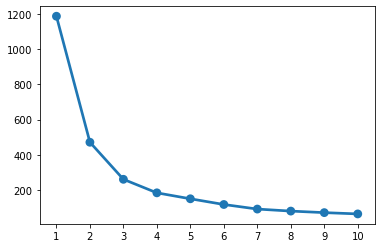

In [140]:
sns.pointplot(a,wss)

In [141]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(Data_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(Data_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5309228403563738
Inertia = 471.3593463989938


In [142]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(Data_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(Data_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5335432108748761
Inertia = 260.57294083762304


In [58]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(Data_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(Data_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5520464132164321
Inertia = 183.60983976801262


In [59]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(Data_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(Data_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.520257626469996
Inertia = 149.78787362952505


In [60]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(Data_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(Data_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5299734848941419
Inertia = 117.31925615245095


In [61]:
k_means = KMeans(n_clusters = 7,random_state=1)
k_means.fit(Data_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(Data_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5559503926370076
Inertia = 91.31804835544854


In [62]:
k_means = KMeans(n_clusters = 8,random_state=1)
k_means.fit(Data_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(Data_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5330116876400053
Inertia = 79.79633768915954


In [63]:
k_means = KMeans(n_clusters = 9,random_state=1)
k_means.fit(Data_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(Data_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5138048639002791
Inertia = 71.06763708986423


In [64]:
k_means = KMeans(n_clusters = 10,random_state=1)
k_means.fit(Data_scaled)
labels = k_means.labels_
print('Silhouette_score =',silhouette_score(Data_scaled,labels,random_state=1))
print('Inertia =',k_means.inertia_)

Silhouette_score = 0.5114240736857004
Inertia = 63.72863653627578
